# MenuItem Table

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_feather("../Data Files/MenuItem.feather")

## Description

Each entry is an item (such as a dish) sold through the menu, including the price and when that dish was recorded or modified in the database

* There are 1332726 records across 9 columns

In [7]:
df.shape

(1332726, 9)

In [8]:
df.dtypes

id                int64
menu_page_id      int64
price           float64
high_price      float64
dish_id         float64
created_at       object
updated_at       object
xpos            float64
ypos            float64
dtype: object

In [9]:
df.head(5)

,id,menu_page_id,price,high_price,dish_id,created_at,updated_at,xpos,ypos
0,1,1389,0.4,NaN,1.0,2011-03-28 15:00:44 UTC,2011-04-19 04:33:15 UTC,0.111429,0.254735
1,2,1389,0.6,NaN,2.0,2011-03-28 15:01:13 UTC,2011-04-19 15:00:54 UTC,0.438571,0.254735
2,3,1389,0.4,NaN,3.0,2011-03-28 15:01:40 UTC,2011-04-19 19:10:05 UTC,0.140000,0.261922
3,4,1389,0.5,NaN,4.0,2011-03-28 15:01:51 UTC,2011-04-19 19:07:01 UTC,0.377143,0.262720
4,5,3079,0.5,1.0,5.0,2011-03-28 15:21:26 UTC,2011-04-13 15:25:27 UTC,0.105714,0.313178


In [10]:
df.describe(include="all")

,id,menu_page_id,price,high_price,dish_id,created_at,updated_at,xpos,ypos
count,1.332726e+06,1.332726e+06,886810.000000,91905.000000,1.332485e+06,1332726,1332726,1.332726e+06,1.332726e+06
unique,NaN,NaN,NaN,NaN,NaN,1291090,1295796,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,2011-04-29 02:04:21 UTC,2011-04-29 02:04:21 UTC,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,6,6,NaN,NaN
mean,6.978984e+05,4.759487e+04,12.838627,8.106321,1.580110e+05,NaN,NaN,3.890132e-01,5.497062e-01
std,3.999807e+05,2.203921e+04,499.547387,90.095222,1.677620e+05,NaN,NaN,2.208378e-01,2.239532e-01
min,1.000000e+00,1.300000e+02,0.000000,0.000000,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00
25%,3.502512e+05,3.204900e+04,0.250000,0.500000,5.089000e+03,NaN,NaN,1.842860e-01,3.669165e-01
50%,7.024105e+05,5.337100e+04,0.400000,1.250000,8.070000e+04,NaN,NaN,3.771430e-01,5.672940e-01
75%,1.045549e+06,6.682300e+04,1.000000,3.000000,3.325240e+05,NaN,NaN,5.653330e-01,7.385308e-01


## Missing Values - Section 3.1

* `price` column is missing 33% of data
* `high_price` column is missing 93% of data

In [11]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage.name = 'Percentage of Missing Values'
missing_percentage

id               0.000000
menu_page_id     0.000000
price           33.458941
high_price      93.103984
dish_id          0.018083
created_at       0.000000
updated_at       0.000000
xpos             0.000000
ypos             0.000000
Name: Percentage of Missing Values, dtype: float64

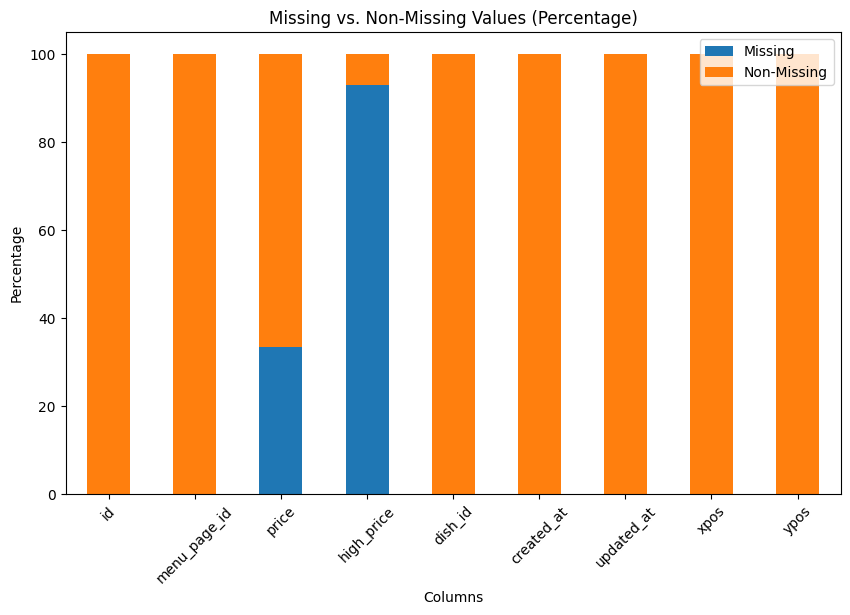

In [12]:
non_missing_percentage = 100 - missing_percentage
missing_data_percentage = pd.DataFrame({'Missing': missing_percentage, 'Non-Missing': non_missing_percentage})
missing_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Missing vs. Non-Missing Values (Percentage)')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

## Foreign Key Violations - Section 3.2

* `menu_page_id` has numerous values that do not exist in the **MenuPage** table. This is a foreign key violation

In [13]:
df_page = pd.read_feather("../Data Files/MenuPage.feather")

In [14]:
df_page.dtypes

id               int64
menu_id          int64
page_number    float64
image_id        object
full_height    float64
full_width     float64
uuid            object
dtype: object

In [15]:

menupage_ids = df_page['id'].unique()

menuitem_page_ids = df['menu_page_id'].unique()

foreign_key_violations = [id for id in menuitem_page_ids if id not in menupage_ids]

if foreign_key_violations:
    print("Foreign key violations found:", foreign_key_violations)
else:
    print("No foreign key violations found.")

No foreign key violations found.
